<h1 align="center"><font size="5">Colorado Car Accident Severity Prediction</font></h1>
<h2 align="center"><font size="5">by Joanna Johnson</font></h2>

In this notebook, I will use Colorado_Accidents dataset (a subset of US_Accidents dataset) to predict the severity level of a car accident (in terms of impact on traffic), in order to help roadway users (e.g. drivers), navigation service providers to make an informed decision whether or not an alternative route should be taken. Also it can be used to help authorities to make more accurate estimation of when the accident-caused traffic jam will be eased, therefore redirect traffic from the impacted roadway to minimize its impact.


The target label for severity will be 1-4, it's a multi-class classification. In the algorithms we've learned so far, k-Nearest Neighbors and Decision Trees are good for this case. I will build and train one model for each of the algorithms and choose the best one for this project.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns

In [2]:
# Read the Colorado_Accidents_new.csv (this is a subset of US_Accidents_June20.csv downloaded from https://smoosavi.org/datasets/us_accidents
# First upload the file to jupyterlab, then use pandas read_csv to read it and assign it to co_accidents_df variable
co_accidents_df=pd.read_csv('Colorado_Accidents_new.csv', encoding = "ISO-8859-1", engine='python')
co_accidents_df.head()

,Rush_Hour,Duration_in_Hour,Interstate,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,2.26,0,A-512419,MapQuest,241.0,2,5/24/2020 11:23,5/24/2020 13:38,39.26,...,False,False,False,False,False,False,Day,Day,Day,Day
1,0,0.49,1,A-512420,MapQuest,245.0,3,5/24/2020 14:24,5/24/2020 14:54,39.05,...,False,False,False,False,False,False,Day,Day,Day,Day
2,1,1.49,1,A-512421,MapQuest,241.0,3,5/24/2020 16:17,5/24/2020 17:47,39.78,...,False,False,False,False,False,False,Day,Day,Day,Day
3,1,0.99,0,A-512422,MapQuest,201.0,2,5/24/2020 16:22,5/24/2020 17:22,39.72,...,False,False,False,False,True,False,Day,Day,Day,Day
4,1,0.49,0,A-512423,MapQuest,241.0,2,5/24/2020 16:54,5/24/2020 17:23,39.56,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
# find out the number of rows in the dataframe
co_accidents_df.shape

(49731, 52)

In [4]:
# show dtype for all columns
co_accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49731 entries, 0 to 49730
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rush_Hour              49731 non-null  int64  
 1   Duration_in_Hour       49731 non-null  float64
 2   Interstate             49731 non-null  int64  
 3   ID                     49731 non-null  object 
 4   Source                 49731 non-null  object 
 5   TMC                    30865 non-null  float64
 6   Severity               49731 non-null  int64  
 7   Start_Time             49731 non-null  object 
 8   End_Time               49731 non-null  object 
 9   Start_Lat              49731 non-null  float64
 10  Start_Lng              49731 non-null  float64
 11  End_Lat                18866 non-null  float64
 12  End_Lng                18866 non-null  float64
 13  Distance(mi)           49731 non-null  float64
 14  Description            49731 non-null  object 
 15  Nu

In [5]:
# drop the columns not being used
co_accidents_df.drop(['ID', 'Source', 'TMC', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'Zipcode', 'State', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction', 'Amenity', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Wind_Chill(F)', 'Precipitation(in)'], axis = 1, inplace=True)
co_accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49731 entries, 0 to 49730
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rush_Hour              49731 non-null  int64  
 1   Duration_in_Hour       49731 non-null  float64
 2   Interstate             49731 non-null  int64  
 3   Severity               49731 non-null  int64  
 4   Distance(mi)           49731 non-null  float64
 5   Temperature(F)         49266 non-null  float64
 6   Humidity(%)            49251 non-null  float64
 7   Pressure(in)           49362 non-null  float64
 8   Visibility(mi)         49089 non-null  float64
 9   Wind_Speed(mph)        44579 non-null  float64
 10  Weather_Condition      49215 non-null  object 
 11  Bump                   49731 non-null  bool   
 12  Crossing               49731 non-null  bool   
 13  Give_Way               49731 non-null  bool   
 14  Junction               49731 non-null  bool   
 15  No

In [6]:
# rename some columns to get rid of parentheses
co_accidents_df.rename(columns = {'Distance(mi)':'Distance_mi', 'Temperature(F)':'Temperature_F', 'Humidity(%)':'Humidity_percent', 'Pressure(in)':'Pressure_in', 'Visibility(mi)':'Visibility_mi', 'Wind_Speed(mph)':'Wind_Speed_mph'}, inplace = True) 
co_accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49731 entries, 0 to 49730
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rush_Hour              49731 non-null  int64  
 1   Duration_in_Hour       49731 non-null  float64
 2   Interstate             49731 non-null  int64  
 3   Severity               49731 non-null  int64  
 4   Distance_mi            49731 non-null  float64
 5   Temperature_F          49266 non-null  float64
 6   Humidity_percent       49251 non-null  float64
 7   Pressure_in            49362 non-null  float64
 8   Visibility_mi          49089 non-null  float64
 9   Wind_Speed_mph         44579 non-null  float64
 10  Weather_Condition      49215 non-null  object 
 11  Bump                   49731 non-null  bool   
 12  Crossing               49731 non-null  bool   
 13  Give_Way               49731 non-null  bool   
 14  Junction               49731 non-null  bool   
 15  No

In [7]:
co_accidents_df.head()

,Rush_Hour,Duration_in_Hour,Interstate,Severity,Distance_mi,Temperature_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Speed_mph,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Astronomical_Twilight
0,0,2.26,0,2,0.00,37.0,76.0,20.74,1.0,14.0,...,False,False,False,False,False,False,False,False,False,Day
1,0,0.49,1,3,0.00,50.0,82.0,23.50,7.0,6.0,...,False,False,False,False,False,False,False,False,False,Day
2,1,1.49,1,3,0.00,46.0,93.0,24.40,2.0,10.0,...,False,False,False,False,False,False,False,False,False,Day
3,1,0.99,0,2,0.00,46.0,93.0,24.40,2.0,10.0,...,False,False,False,False,False,False,False,True,False,Day
4,1,0.49,0,2,7.25,45.0,NaN,24.20,2.0,6.0,...,False,False,False,False,False,False,False,False,False,Day


In [8]:
# let's see how many of each class is in our dataset.
co_accidents_df['Severity'].value_counts()

2    25516
3    19888
4     3808
1      519
Name: Severity, dtype: int64

In [9]:
# correlation between the numeric variables
co_accidents_df.corr()

,Rush_Hour,Duration_in_Hour,Interstate,Severity,Distance_mi,Temperature_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Speed_mph,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Rush_Hour,1.000000,-0.047480,-0.105483,-0.248535,-0.079848,-0.089334,0.096818,0.087034,0.050170,-0.047366,...,0.017083,-0.055271,0.002493,0.008871,-0.006432,0.046819,0.030820,-0.010083,0.141437,NaN
Duration_in_Hour,-0.047480,1.000000,-0.011214,0.068676,0.048962,0.031803,-0.026255,0.075781,0.009713,0.020977,...,-0.007750,0.058521,-0.007731,-0.006014,-0.000976,-0.017361,-0.014389,-0.003085,-0.052569,NaN
Interstate,-0.105483,-0.011214,1.000000,0.302019,0.052215,-0.011441,-0.025293,-0.213981,0.006712,-0.004378,...,-0.011877,0.092324,-0.041062,-0.031446,-0.002848,-0.081205,-0.108952,-0.016491,-0.317072,NaN
Severity,-0.248535,0.068676,0.302019,1.000000,0.204072,0.044818,-0.062342,-0.068893,-0.005286,0.047433,...,-0.011997,0.070189,-0.031901,-0.026014,-0.003745,-0.097874,-0.081742,0.012266,-0.359589,NaN
Distance_mi,-0.079848,0.048962,0.052215,0.204072,1.000000,-0.009808,0.008677,-0.026448,-0.034711,0.043553,...,-0.004578,0.015618,-0.006061,-0.008069,-0.000848,-0.024903,0.007666,0.021221,-0.084469,NaN
Temperature_F,-0.089334,0.031803,-0.011441,0.044818,-0.009808,1.000000,-0.643025,-0.119968,0.179998,0.053684,...,0.002820,0.033698,-0.002444,-0.011805,-0.001672,-0.017655,-0.019607,0.010218,-0.004559,NaN
Humidity_percent,0.096818,-0.026255,-0.025293,-0.062342,0.008677,-0.643025,1.000000,0.073916,-0.310505,-0.151871,...,0.002179,-0.033311,-0.004007,0.009876,0.005699,0.030480,0.032557,-0.010694,0.027964,NaN
Pressure_in,0.087034,0.075781,-0.213981,-0.068893,-0.026448,-0.119968,0.073916,1.000000,0.148512,0.062430,...,0.005642,0.015048,0.003584,0.004370,0.004126,0.026333,0.019268,-0.020532,0.014950,NaN
Visibility_mi,0.050170,0.009713,0.006712,-0.005286,-0.034711,0.179998,-0.310505,0.148512,1.000000,-0.024025,...,0.022543,0.079586,0.029683,-0.002127,-0.001164,-0.016077,0.000025,0.012626,-0.040115,NaN
Wind_Speed_mph,-0.047366,0.020977,-0.004378,0.047433,0.043553,0.053684,-0.151871,0.062430,-0.024025,1.000000,...,-0.013801,0.004643,-0.000340,-0.005329,-0.000487,-0.012327,-0.006743,0.005619,-0.008842,NaN


<AxesSubplot:xlabel='Interstate', ylabel='Severity'>

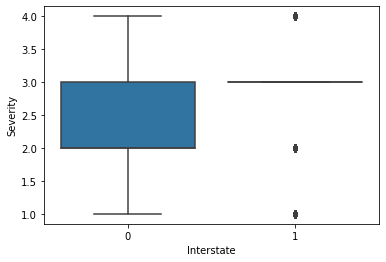

In [10]:
# let's look at the relationship between Interstate and Severity
sns.boxplot(x="Interstate", y="Severity", data=co_accidents_df)

In [11]:
co_accidents_df.groupby(['Interstate'])['Severity'].value_counts(normalize=True)

Interstate  Severity
0           2           0.634424
            3           0.272940
            4           0.079233
            1           0.013403
1           3           0.714786
            2           0.212162
            4           0.069974
            1           0.003079
Name: Severity, dtype: float64

<AxesSubplot:xlabel='Rush_Hour', ylabel='Severity'>

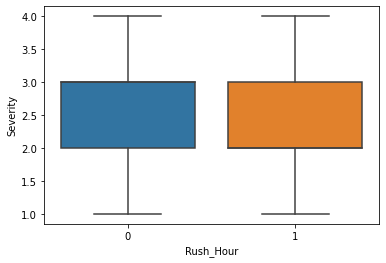

In [12]:
# let's look at the relationship between Rush_Hour and Severity
sns.boxplot(x="Rush_Hour", y="Severity", data=co_accidents_df)

In [13]:
co_accidents_df.groupby(['Rush_Hour'])['Severity'].value_counts(normalize=True)

Rush_Hour  Severity
0          3           0.517583
           2           0.335915
           4           0.134391
           1           0.012111
1          2           0.599193
           3           0.342716
           4           0.048469
           1           0.009622
Name: Severity, dtype: float64

<AxesSubplot:xlabel='Crossing', ylabel='Severity'>

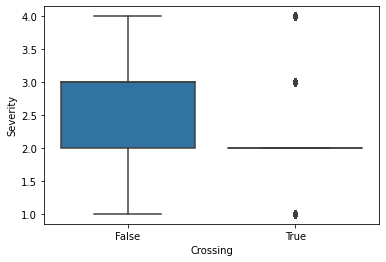

In [14]:
# let's look at the relationship between Crossing and Severity
sns.boxplot(x="Crossing", y="Severity", data=co_accidents_df)

In [15]:
co_accidents_df.groupby(['Crossing'])['Severity'].value_counts(normalize=True)

Crossing  Severity
False     3           0.483780
          2           0.420108
          4           0.088342
          1           0.007770
True      2           0.884094
          3           0.065228
          4           0.029604
          1           0.021074
Name: Severity, dtype: float64

<AxesSubplot:xlabel='Stop', ylabel='Severity'>

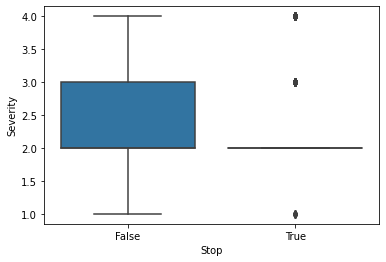

In [16]:
# let's look at the relationship between Stop and Severity
sns.boxplot(x="Stop", y="Severity", data=co_accidents_df)

In [17]:
co_accidents_df.groupby(['Stop'])['Severity'].value_counts(normalize=True)

Stop   Severity
False  2           0.503314
       3           0.409801
       4           0.076302
       1           0.010584
True   2           0.838509
       4           0.085576
       3           0.070393
       1           0.005521
Name: Severity, dtype: float64

<AxesSubplot:xlabel='Traffic_Signal', ylabel='Severity'>

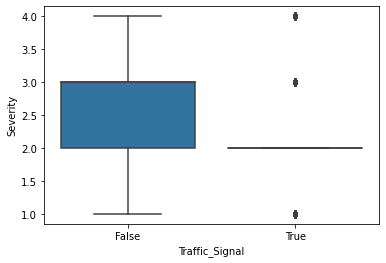

In [18]:
# let's look at the relationship between Traffic_Signal and Severity
sns.boxplot(x="Traffic_Signal", y="Severity", data=co_accidents_df)

In [19]:
co_accidents_df.groupby(['Traffic_Signal'])['Severity'].value_counts(normalize=True)

Traffic_Signal  Severity
False           3           0.498818
                2           0.405813
                4           0.089460
                1           0.005908
True            2           0.863828
                3           0.076500
                4           0.034429
                1           0.025243
Name: Severity, dtype: float64

<AxesSubplot:xlabel='Junction', ylabel='Severity'>

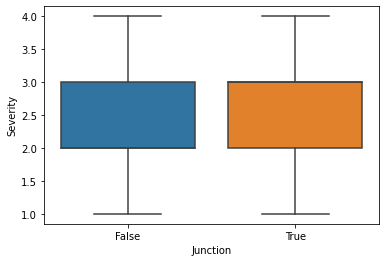

In [20]:
# let's look at the relationship between Junction and Severity
sns.boxplot(x="Junction", y="Severity", data=co_accidents_df)

In [21]:
co_accidents_df.groupby(['Junction'])['Severity'].value_counts(normalize=True)

Junction  Severity
False     2           0.522244
          3           0.392864
          4           0.074396
          1           0.010497
True      3           0.511510
          2           0.367976
          4           0.111036
          1           0.009479
Name: Severity, dtype: float64

<AxesSubplot:xlabel='Give_Way', ylabel='Severity'>

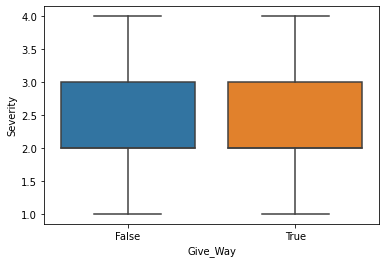

In [22]:
# let's look at the relationship between Give_Way and Severity
sns.boxplot(x="Give_Way", y="Severity", data=co_accidents_df)

In [23]:
co_accidents_df.groupby(['Give_Way'])['Severity'].value_counts(normalize=True)

Give_Way  Severity
False     2           0.512374
          3           0.400563
          4           0.076593
          1           0.010470
True      2           0.611898
          3           0.308782
          4           0.073654
          1           0.005666
Name: Severity, dtype: float64

<AxesSubplot:xlabel='Duration_in_Hour', ylabel='Severity'>

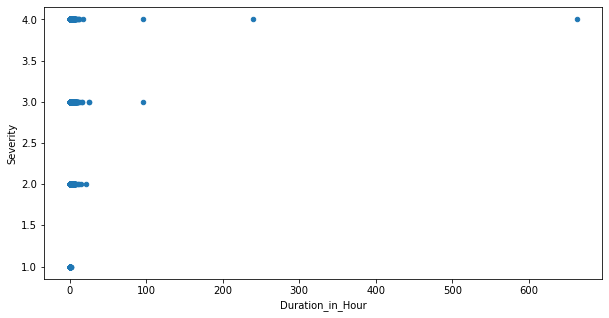

In [24]:
# let's visualize the relationship between Duration_in_Hour and Severity
co_accidents_df.plot(kind='scatter',x='Duration_in_Hour', y='Severity', figsize=(10,5))

<AxesSubplot:xlabel='Distance_mi', ylabel='Severity'>

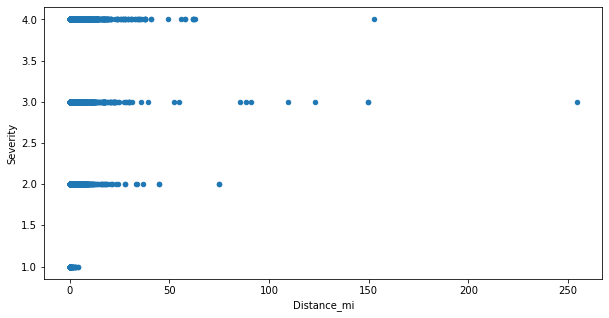

In [25]:
# let's visualize the relationship between Distance_mi and Severity
co_accidents_df.plot(kind='scatter',x='Distance_mi', y='Severity', figsize=(10,5))

<AxesSubplot:xlabel='Visibility_mi', ylabel='Severity'>

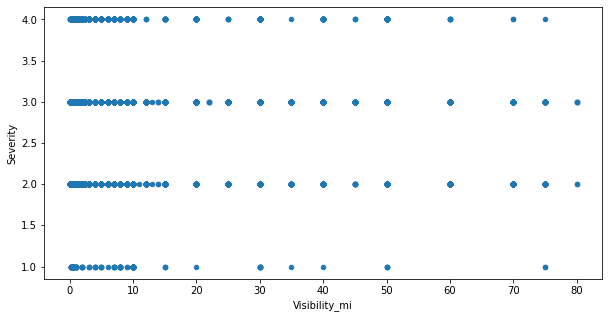

In [26]:
# let's visualize the relationship between Visibility_mi and Severity
co_accidents_df.plot(kind='scatter',x='Visibility_mi', y='Severity', figsize=(10,5))

<AxesSubplot:xlabel='Wind_Speed_mph', ylabel='Severity'>

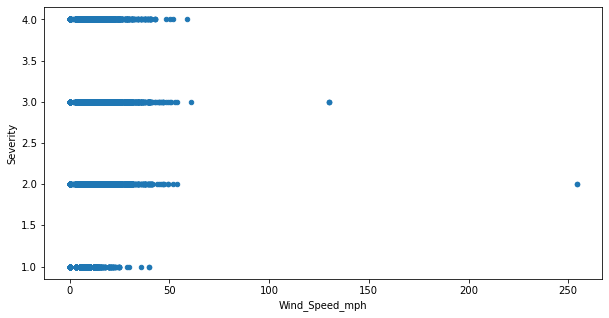

In [27]:
# let's visualize the relationship between Wind_Speed_mph and Severity
co_accidents_df.plot(kind='scatter',x='Wind_Speed_mph', y='Severity', figsize=(10,5))

<AxesSubplot:xlabel='Temperature_F', ylabel='Severity'>

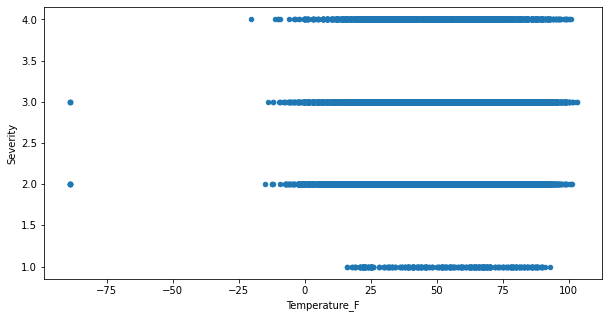

In [28]:
# let's visualize the relationship between Temperature_F and Severity
co_accidents_df.plot(kind='scatter',x='Temperature_F', y='Severity', figsize=(10,5))

<AxesSubplot:xlabel='Humidity_percent', ylabel='Severity'>

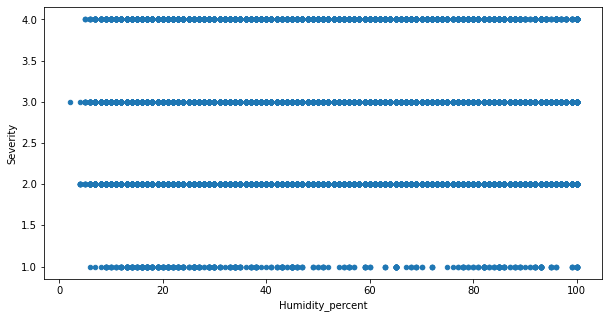

In [29]:
# let's visualize the relationship between Humidity_percent and Severity
co_accidents_df.plot(kind='scatter',x='Humidity_percent', y='Severity', figsize=(10,5))

<AxesSubplot:xlabel='Pressure_in', ylabel='Severity'>

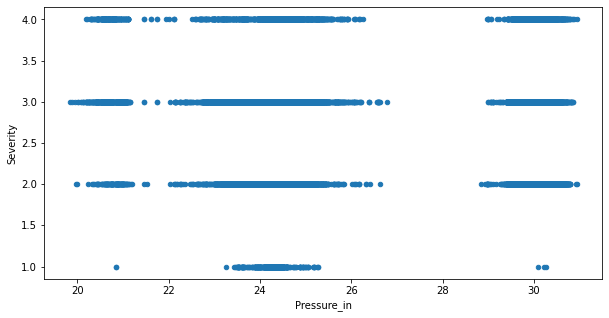

In [30]:
# let's visualize the relationship between Pressure_in and Severity
co_accidents_df.plot(kind='scatter',x='Pressure_in', y='Severity', figsize=(10,5))

<AxesSubplot:xlabel='Bump', ylabel='Severity'>

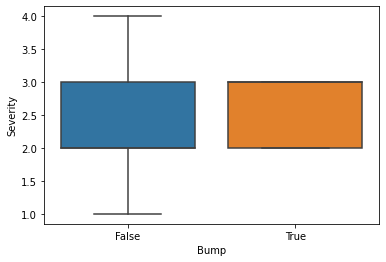

In [31]:
# let's look at the relationship between Bump and Severity
sns.boxplot(x="Bump", y="Severity", data=co_accidents_df)

In [32]:
co_accidents_df.groupby(['Bump'])['Severity'].value_counts(normalize=True)

Bump   Severity
False  2           0.513346
       3           0.399553
       4           0.076654
       1           0.010447
True   3           0.735849
       2           0.264151
Name: Severity, dtype: float64

<AxesSubplot:xlabel='No_Exit', ylabel='Severity'>

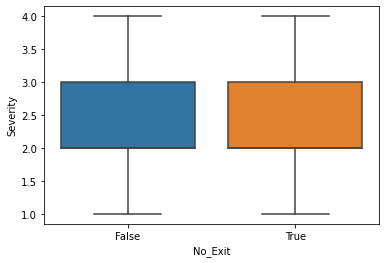

In [33]:
# let's look at the relationship between No_Exit and Severity
sns.boxplot(x="No_Exit", y="Severity", data=co_accidents_df)

In [34]:
co_accidents_df.groupby(['No_Exit'])['Severity'].value_counts(normalize=True)

No_Exit  Severity
False    2           0.511506
         3           0.401218
         4           0.076887
         1           0.010390
True     2           0.685144
         3           0.257206
         4           0.042129
         1           0.015521
Name: Severity, dtype: float64

<AxesSubplot:xlabel='Railway', ylabel='Severity'>

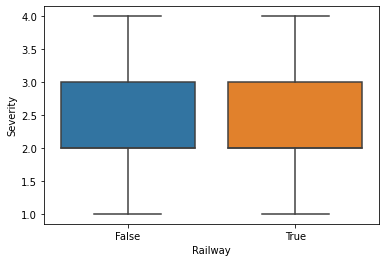

In [35]:
# let's look at the relationship between Railway and Severity
sns.boxplot(x="Railway", y="Severity", data=co_accidents_df)

In [36]:
co_accidents_df.groupby(['Railway'])['Severity'].value_counts(normalize=True)

Railway  Severity
False    2           0.511734
         3           0.401331
         4           0.076515
         1           0.010419
True     2           0.732673
         3           0.168317
         4           0.085809
         1           0.013201
Name: Severity, dtype: float64

<AxesSubplot:xlabel='Roundabout', ylabel='Severity'>

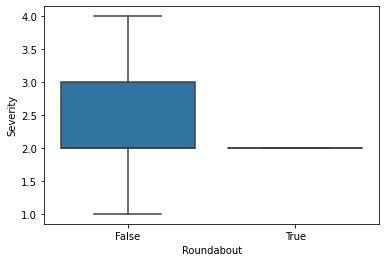

In [37]:
# let's look at the relationship between Roundabout and Severity
sns.boxplot(x="Roundabout", y="Severity", data=co_accidents_df)

In [38]:
co_accidents_df.groupby(['Roundabout'])['Severity'].value_counts(normalize=True)

Roundabout  Severity
False       2           0.513071
            3           0.399920
            4           0.076573
            1           0.010436
True        2           1.000000
Name: Severity, dtype: float64

<AxesSubplot:xlabel='Station', ylabel='Severity'>

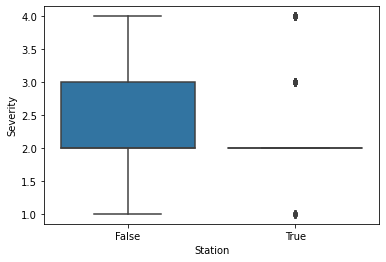

In [39]:
# let's look at the relationship between Station and Severity
sns.boxplot(x="Station", y="Severity", data=co_accidents_df)

In [40]:
co_accidents_df.groupby(['Station'])['Severity'].value_counts(normalize=True)

Station  Severity
False    2           0.505110
         3           0.407080
         4           0.077488
         1           0.010322
True     2           0.901099
         3           0.050949
         4           0.031968
         1           0.015984
Name: Severity, dtype: float64

<AxesSubplot:xlabel='Traffic_Calming', ylabel='Severity'>

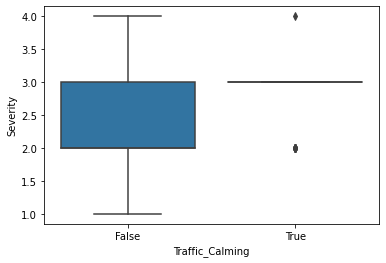

In [41]:
# let's look at the relationship between Traffic_Calming and Severity
sns.boxplot(x="Traffic_Calming", y="Severity", data=co_accidents_df)

In [42]:
co_accidents_df.groupby(['Traffic_Calming'])['Severity'].value_counts(normalize=True)

Traffic_Calming  Severity
False            2           0.513398
                 3           0.399513
                 4           0.076641
                 1           0.010448
True             3           0.741379
                 2           0.241379
                 4           0.017241
Name: Severity, dtype: float64

<AxesSubplot:xlabel='Turning_Loop', ylabel='Severity'>

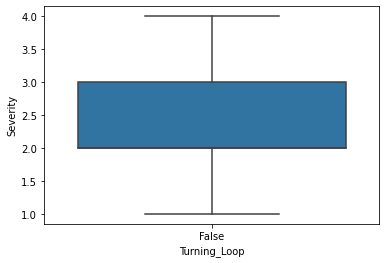

In [43]:
# let's look at the relationship between Turning_Loop and Severity
sns.boxplot(x="Turning_Loop", y="Severity", data=co_accidents_df)

<AxesSubplot:xlabel='Astronomical_Twilight', ylabel='Severity'>

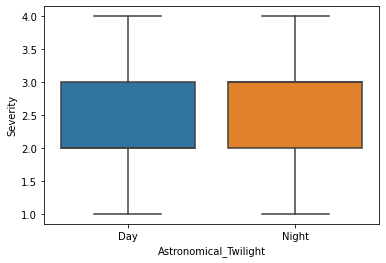

In [44]:
# let's look at the relationship between Astronomical_Twilight and Severity
sns.boxplot(x="Astronomical_Twilight", y="Severity", data=co_accidents_df) 

In [45]:
co_accidents_df.groupby(['Astronomical_Twilight'])['Severity'].value_counts(normalize=True)

Astronomical_Twilight  Severity
Day                    2           0.530876
                       3           0.392490
                       4           0.065200
                       1           0.011434
Night                  3           0.469948
                       2           0.345759
                       4           0.183246
                       1           0.001047
Name: Severity, dtype: float64

In [46]:
# Feature selection (based on the output of above data analysis, 10 features are selected)
Feature = co_accidents_df[['Duration_in_Hour','Interstate','Distance_mi','Crossing','Give_Way','Railway','Station','Stop','Traffic_Calming','Traffic_Signal']]
Feature.head()

,Duration_in_Hour,Interstate,Distance_mi,Crossing,Give_Way,Railway,Station,Stop,Traffic_Calming,Traffic_Signal
0,2.26,0,0.00,False,False,False,False,False,False,False
1,0.49,1,0.00,False,False,False,False,False,False,False
2,1.49,1,0.00,False,False,False,False,False,False,False
3,0.99,0,0.00,True,True,False,False,False,False,True
4,0.49,0,7.25,False,False,False,False,False,False,False


In [47]:
# Lets defind feature sets, X:
X=Feature
X[0:5]

,Duration_in_Hour,Interstate,Distance_mi,Crossing,Give_Way,Railway,Station,Stop,Traffic_Calming,Traffic_Signal
0,2.26,0,0.00,False,False,False,False,False,False,False
1,0.49,1,0.00,False,False,False,False,False,False,False
2,1.49,1,0.00,False,False,False,False,False,False,False
3,0.99,0,0.00,True,True,False,False,False,False,True
4,0.49,0,7.25,False,False,False,False,False,False,False


In [48]:
# y is defined as our labels
y=co_accidents_df['Severity'].values
y[0:5]

array([2, 3, 3, 2, 2])

In [49]:
# Normalize Data / Data Standardization
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  


array([[ 0.25899939, -0.63501569, -0.18902164, -0.50059061, -0.08455136,
        -0.07829514, -0.14332397, -0.17323736, -0.03417069, -0.55301353],
       [-0.22859384,  1.57476425, -0.18902164, -0.50059061, -0.08455136,
        -0.07829514, -0.14332397, -0.17323736, -0.03417069, -0.55301353],
       [ 0.04688256,  1.57476425, -0.18902164, -0.50059061, -0.08455136,
        -0.07829514, -0.14332397, -0.17323736, -0.03417069, -0.55301353],
       [-0.09085564, -0.63501569, -0.18902164,  1.99764035, 11.82713067,
        -0.07829514, -0.14332397, -0.17323736, -0.03417069,  1.80827401],
       [-0.22859384, -0.63501569,  2.3205886 , -0.50059061, -0.08455136,
        -0.07829514, -0.14332397, -0.17323736, -0.03417069, -0.55301353]])

In [50]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

In [51]:
# Split the data into train set and test set
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=4)

In [52]:
# K Nearest Neighbor(KNN) Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k=15
mean_acc=np.zeros((k-1))
std_acc=np.zeros((k-1))
ConfusionMx=[]
for n in range(1,k):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc
print("The best accuracy was ", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was  0.7469588820749975 with k= 13


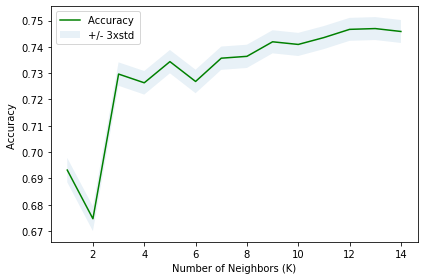

In [53]:
plt.plot(range(1,k),mean_acc,'g')
plt.fill_between(range(1,k),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [54]:
k=13
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
yhat=neigh.predict(X_test)
knn_jacc=jaccard_similarity_score(y_test, yhat)
knn_f1=f1_score(y_test, yhat, average='weighted')
print("KNN's Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("jaccard: ", knn_jacc)
print("f1 score: ", knn_f1)

KNN's Accuracy:  0.7469588820749975
jaccard:  0.7469588820749975
f1 score:  0.7389155921811446


In [55]:
# Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
sevTree = DecisionTreeClassifier(criterion="entropy")
sevTree.fit(X_train,y_train)
predTree = sevTree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
dt_jacc=jaccard_similarity_score(y_test, predTree)
dt_f1=f1_score(y_test, predTree, average='weighted')
print("jaccard: ", dt_jacc)
print("f1 score: ", dt_f1)

DecisionTrees's Accuracy:  0.7532924499849201
jaccard:  0.7532924499849201
f1 score:  0.746948213276254


In [56]:
# Comparison of the two models
my_rpt = {'Algorithm': ['KNN','Decision Tree'],'Jaccard': [knn_jacc, dt_jacc], 'F1-score':[knn_f1, dt_f1]}
rpt_df = pd.DataFrame(my_rpt, columns = ['Algorithm', 'Jaccard', 'F1-score'])
rpt_df.set_index('Algorithm', inplace=True)
rpt_df

,Jaccard,F1-score
Algorithm,,
KNN,0.746959,0.738916
Decision Tree,0.753292,0.746948


<h2 align="center"><font size="5">Decision Tree has slight better performance in this case, it's chosen for Colorado Car Accident Severity Prediction!</font></h2>